In [1]:
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator as GLM
from h2o.estimators.gbm import H2OGradientBoostingEstimator as GBM
from h2o.estimators.random_forest import H2ORandomForestEstimator as RF

%matplotlib inline

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_191"; Java(TM) SE Runtime Environment (build 1.8.0_191-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from /home/am/anaconda3/envs/h2o/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7hjshd9o
  JVM stdout: /tmp/tmp7hjshd9o/h2o_am_started_from_python.out
  JVM stderr: /tmp/tmp7hjshd9o/h2o_am_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,18 days
H2O cluster name:,H2O_from_python_am_3z4r3u
H2O cluster total nodes:,1
H2O cluster free memory:,6.957 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [3]:
boston_df = h2o.import_file("../Chapter08/boston/train.csv", destination_frame="boston_df")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
boston_df.describe()

Rows:333
Cols:15




,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
type,int,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,1.0,0.00632,0.0,0.74,0.0,0.385,3.561,6.0,1.1296,1.0,188.0,12.6,3.5,1.73,5.0
mean,250.95195195195197,3.360341471471469,10.689189189189195,11.293483483483486,0.06006006006006006,0.5571441441441435,6.26561861861862,68.22642642642644,3.7099336336336366,9.633633633633636,409.2792792792793,18.44804804804806,359.4660960960961,12.515435435435434,22.76876876876877
maxs,506.0,73.5341,100.0,27.74,1.0,0.871,8.725,100.0,10.7103,24.0,711.0,21.2,396.9,37.97,50.0
sigma,147.8594378018597,7.352271836781104,22.674761796618217,6.998123104477312,0.23795564281644838,0.11495450830289311,0.7039515757334472,28.13334360562338,1.9811230514407001,8.742174349631064,170.84198846058237,2.1518213294390836,86.58456685718393,7.0677808035857845,9.173468027315417
zeros,0,0,248,0,313,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
1,2.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
2,4.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


Text(0.5, 1.0, 'Correlation Heatmap')

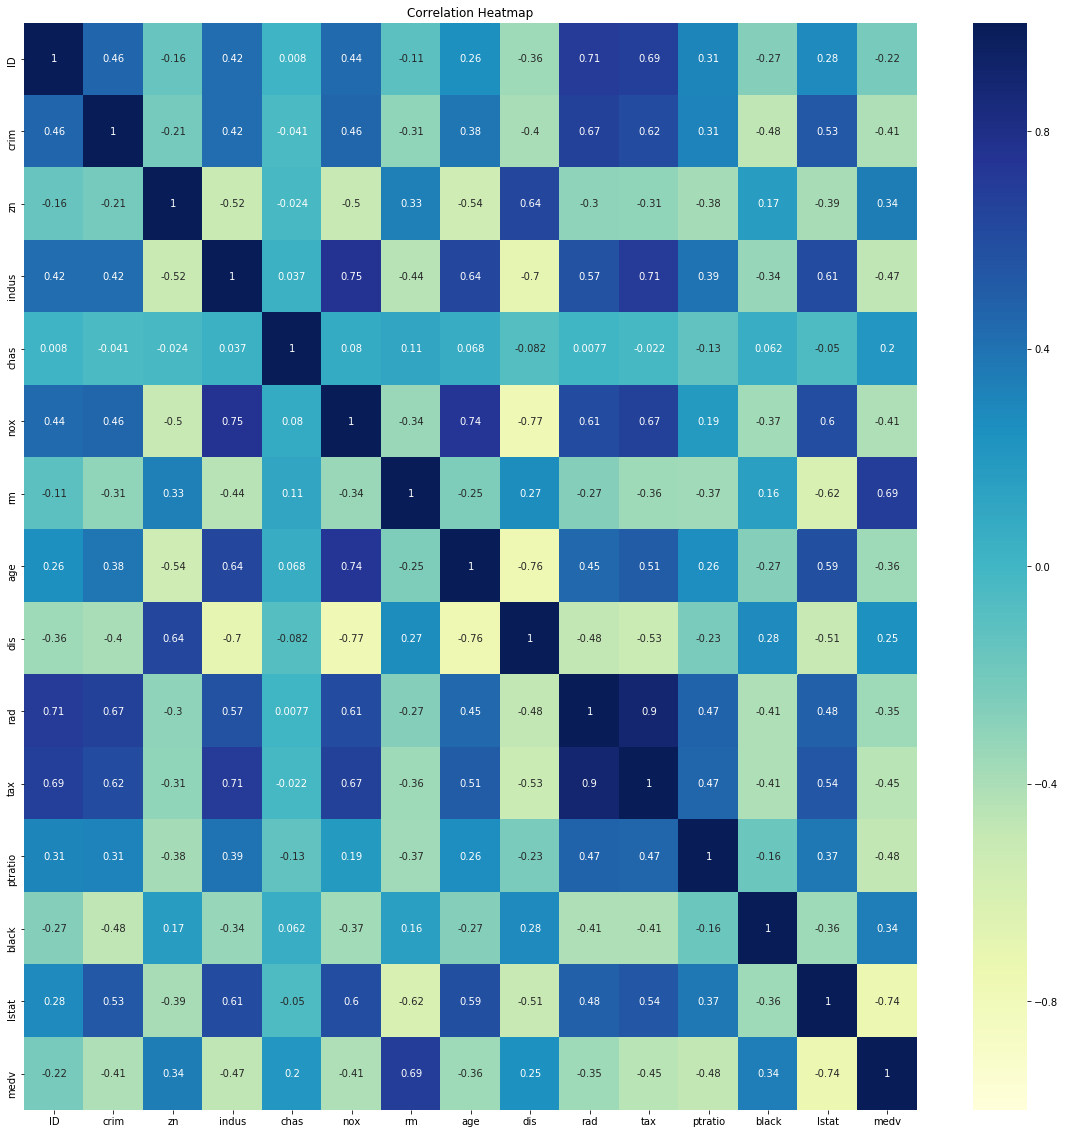

In [5]:
plt.figure(figsize=(20,20))
corr = boston_df.cor()
corr = corr.as_data_frame()
corr.index = boston_df.columns
#print(corr)
sns.heatmap(corr, annot=True, cmap='YlGnBu',vmin=-1, vmax=1)
plt.title("Correlation Heatmap")

In [6]:
train_df, valid_df, test_df = boston_df.split_frame(ratios=[0.6, 0.2], seed=133)


In [7]:
features =  boston_df.columns[:-1]
print(features)


['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


In [8]:
model_glm = GLM(model_id='boston_glm')
model_glm.train(training_frame= train_df, validation_frame=valid_df, y = 'medv', x=features)
print(model_glm)

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  boston_glm


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 25.29061565365854
RMSE: 5.028977595263131
MAE: 3.5119806236622573
RMSLE: 0.21879597717063684
R^2: 0.6585836959508422
Mean Residual Deviance: 25.29061565365854
Null degrees of freedom: 199
Residual degrees of freedom: 188
Null deviance: 14815.118876113953
Residual deviance: 5058.123130731708
AIC: 1239.662094110731

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 29.45943429400654
RMSE: 5.427654584994014
MAE: 3.9827620428290818
RMSLE: 0.23155132773489584
R^2: 0.6075220878659529
Mean Residual Deviance: 29.45943429400654
Null degrees of freedom: 57
Residual degrees of freedom: 46
Null deviance: 4379.649896571945
Residual deviance: 1708.6471890523794
AIC: 386.81169393537243
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-12-10 22:21:59,0.000 sec,0,14815.1187500,74.0755937


In [9]:
test_glm = model_glm.model_performance(test_df)
print(test_glm)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 58.79022368779993
RMSE: 7.667478313487423
MAE: 4.535525812229012
RMSLE: 0.2716211906586539
R^2: 0.4911310682143256
Mean Residual Deviance: 58.79022368779993
Null degrees of freedom: 74
Residual degrees of freedom: 63
Null deviance: 8748.76368890764
Residual deviance: 4409.266776584995
AIC: 544.388948275823



In [10]:
model_gbm = GBM(model_id='boston_gbm')
model_gbm.train(training_frame= train_df, validation_frame=valid_df, y = 'medv', x=features)
print(model_gbm)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  boston_glm


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2.042942663976728
RMSE: 1.4293154529272842
MAE: 0.956157636642456
RMSLE: 0.07545015650988193
Mean Residual Deviance: 2.042942663976728

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 9.952095863557963
RMSE: 3.1546942583328046
MAE: 2.4723717368870632
RMSLE: 0.14778009630478506
Mean Residual Deviance: 9.952095863557963
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-12-10 22:21:59,0.007 sec,0.0,8.6067180,6.2086750,74.0755944,8.6897184,6.4062069,75.5112051
,2018-12-10 22:22:00,0.082 sec,1.0,7.8745256,5.6955418,62.0081539,7.9158332,5.8378586,62.6604157
,2018-12-10 22:22:00,0.099 sec,2.0,7.2269157,5.2468596,52.2283100,7.3528982,5.3666290,54.0651123
,2018-12-10 22:22:00,0.110 sec,3.0,6.6511410,4.8407240,44.2376772,6.7305981,4.9209957,45.3009512
,2018-12-10 22:22:00,0.119 sec,4.0,6.1352543,4.4610242,37.6413451,6.2253171,4.5300788,38.7545733
---,---,---,---,---,---,---,---,---,---
,2018-12-10 22:22:00,0.367 sec,46.0,1.4819746,0.9849367,2.1962487,3.1864196,2.5048409,10.1532696
,2018-12-10 22:22:00,0.372 sec,47.0,1.4650429,0.9735427,2.1463508,3.1658451,2.4840720,10.0225753
,2018-12-10 22:22:00,0.378 sec,48.0,1.4519266,0.9678361,2.1080908,3.1687301,2.4885291,10.0408505
,2018-12-10 22:22:00,0.383 sec,49.0,1.4405848,0.9627064,2.0752845,3.1696857,2.4854322,10.0469074



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
rm,35352.7656250,1.0,0.4662487
lstat,30494.9238281,0.8625895,0.4021812
crim,2075.9633789,0.0587214,0.0273788
dis,1768.7695312,0.0500320,0.0233274
ID,1526.9898682,0.0431929,0.0201386
age,1282.9465332,0.0362898,0.0169201
ptratio,1082.0786133,0.0306080,0.0142710
tax,746.5069580,0.0211159,0.0098453
nox,697.5780029,0.0197319,0.0092000
chas,280.3769226,0.0079308,0.0036977


In [11]:
test_gbm = model_gbm.model_performance(test_df)
print(test_gbm)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 28.403762409118233
RMSE: 5.329518027844379
MAE: 2.8727256028741603
RMSLE: 0.18390281605425915
Mean Residual Deviance: 28.403762409118233



In [12]:
model_rf = RF(model_id='boston_rf')
model_rf.train(training_frame= train_df, validation_frame=valid_df, y = 'medv', x=features)
print(model_rf)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  boston_glm


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 13.535222159406818
RMSE: 3.6790246206578745
MAE: 2.50327929070973
RMSLE: 0.15461658290638441
Mean Residual Deviance: 13.535222159406818

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 10.280927854920087
RMSE: 3.2063886001107362
MAE: 2.559741400028097
RMSLE: 0.13662446955334076
Mean Residual Deviance: 10.280927854920087
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-12-10 22:22:00,0.002 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-12-10 22:22:00,0.030 sec,1.0,6.1203567,3.8863012,37.4587663,4.8514129,3.4137930,23.5362067
,2018-12-10 22:22:00,0.048 sec,2.0,6.0681136,3.8797521,36.8220031,4.2660903,3.0629310,18.1995261
,2018-12-10 22:22:00,0.059 sec,3.0,5.5984111,3.6712121,31.3422072,3.7375426,2.8063218,13.9692244
,2018-12-10 22:22:00,0.068 sec,4.0,5.7955455,3.7337991,33.5883478,3.8810291,2.7875001,15.0623868
---,---,---,---,---,---,---,---,---,---
,2018-12-10 22:22:00,0.328 sec,46.0,3.6409822,2.4835955,13.2567512,3.2289387,2.5635120,10.4260448
,2018-12-10 22:22:00,0.333 sec,47.0,3.6524235,2.4942580,13.3401974,3.2239423,2.5659024,10.3938040
,2018-12-10 22:22:00,0.337 sec,48.0,3.6471355,2.4851220,13.3015976,3.2155629,2.5646372,10.3398446
,2018-12-10 22:22:00,0.343 sec,49.0,3.6624611,2.4938515,13.4136211,3.2121006,2.5709536,10.3175903



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
lstat,170228.8437500,1.0,0.2983517
rm,146500.5781250,0.8606096,0.2567643
ptratio,62365.9335938,0.3663653,0.1093057
ID,30946.3027344,0.1817924,0.0542381
indus,30772.8671875,0.1807735,0.0539341
crim,30057.4687500,0.1765710,0.0526802
dis,24625.0761719,0.1446587,0.0431592
nox,18071.7949219,0.1061618,0.0316735
tax,17483.3437500,0.1027049,0.0306422
age,17011.5605469,0.0999335,0.0298153


In [13]:
test_rf = model_rf.model_performance(test_df)
print(test_rf)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 26.47634734831408
RMSE: 5.145517209019331
MAE: 2.7435666684468587
RMSLE: 0.16544264104460665
Mean Residual Deviance: 26.47634734831408



In [21]:
from h2o.grid.grid_search import H2OGridSearch as Grid

hyper_params = {'max_depth':[2,4,6,8,10,12,14,16]}

grid = Grid(model_gbm, hyper_params, grid_id='depth_grid')

grid.train(training_frame= train_df, validation_frame=valid_df, y = 'medv', x=features)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [22]:
print(grid)

    max_depth           model_ids   residual_deviance
0           2  depth_grid_model_1   8.582603711148172
1           6  depth_grid_model_3  10.299542166052671
2           4  depth_grid_model_2  10.378852893143074
3          16  depth_grid_model_8  11.350201168324462
4          12  depth_grid_model_6  11.350201168324462
5          14  depth_grid_model_7  11.350201168324462
6           8  depth_grid_model_4  11.386830104743034
7          10  depth_grid_model_5  11.408501214655228



In [24]:
from h2o.automl import H2OAutoML as AutoML

aml = AutoML(max_models = 10, max_runtime_secs=100, seed=2)
aml.train(training_frame= train_df, validation_frame=valid_df, y = 'medv', x=features)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [25]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20181210_223722,9.82793,3.13495,9.82793,2.13917,0.139589
StackedEnsemble_BestOfFamily_AutoML_20181210_223722,9.94461,3.15351,9.94461,2.14671,0.138903
GBM_3_AutoML_20181210_223722,10.2273,3.19802,10.2273,2.24126,0.14437
GBM_2_AutoML_20181210_223722,10.2627,3.20355,10.2627,2.23899,0.143894
GBM_1_AutoML_20181210_223722,10.2719,3.20498,10.2719,2.21991,0.147681
GBM_4_AutoML_20181210_223722,10.287,3.20734,10.287,2.24546,0.144326
XGBoost_2_AutoML_20181210_223722,10.3645,3.21939,10.3645,2.05124,0.143118
XGBoost_1_AutoML_20181210_223722,11.068,3.32686,11.068,2.16475,0.14958
XGBoost_3_AutoML_20181210_223722,11.3421,3.3678,11.3421,2.26389,0.147565
XRT_1_AutoML_20181210_223722,12.0748,3.47488,12.0748,2.31572,0.141624
